In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!unzip -q "/content/gdrive/My Drive/Research_project/data-set.zip"      #unzip dataset

In [ ]:
import os
import argparse
from imutils import paths
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
INIT_LR = 1e-3
EPOCHS = 10
BS = 8
data = "/content/Data"

In [ ]:
args={}
args["dataset"]=data

In [ ]:
import numpy as np
import cv2
imgPaths = list(paths.list_images(args["dataset"]))   #image paths
data = []
labels = []
for imgPath in imgPaths:
    label = imgPath.split(os.path.sep)[-2]            #split the image paths
    img = cv2.imread(imgPath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)        #Convert images into RGB Channel
    img = cv2.resize(img, (224, 224))                 #Resizing the images
    data.append(img)
    labels.append(label)
data = np.array(data) / 255.0
labels = np.array(labels)

In [ ]:
import os
dataDir = "Data//"                                    # set data directory

In [ ]:
covidImg = os.listdir(dataDir+"Covid")                # Covid directory
normalImg = os.listdir(dataDir+"Normal")              # Healthy directory

Normal Chest X-ray Vs Covid-19 infected Chest X-ray


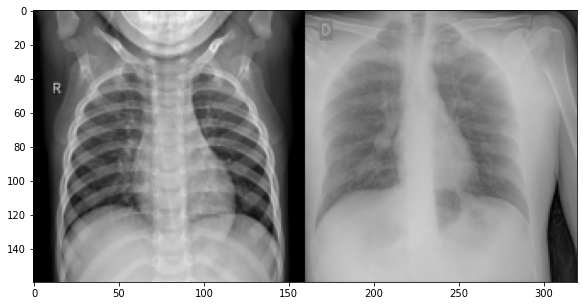

Normal Chest X-ray Vs Covid-19 infected Chest X-ray


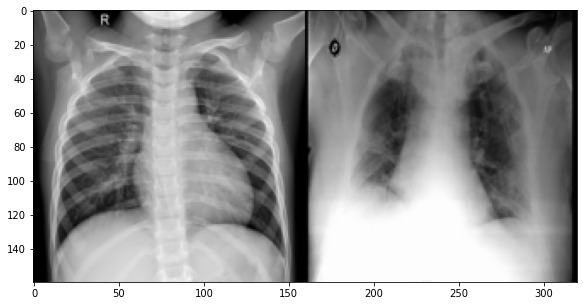

Normal Chest X-ray Vs Covid-19 infected Chest X-ray


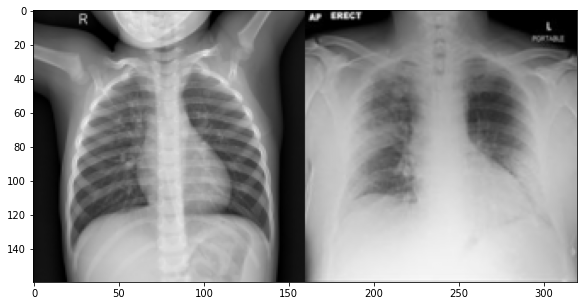

Normal Chest X-ray Vs Covid-19 infected Chest X-ray


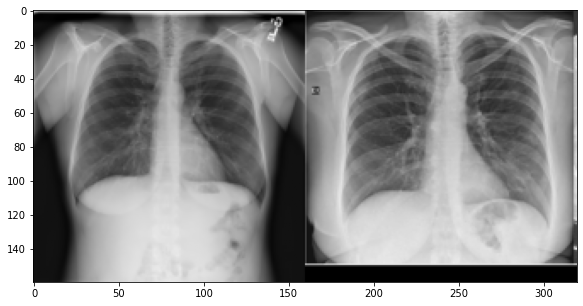

Normal Chest X-ray Vs Covid-19 infected Chest X-ray


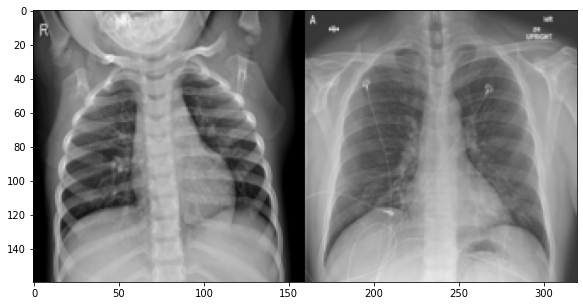

In [ ]:
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.transform import resize
import numpy as np
def plotter(i):
    normal = cv2.imread(dataDir+"Normal//"+normalImg[i])
    normal = skimage.transform.resize(normal, (160, 160, 3))
    covid = cv2.imread(dataDir+"Covid//"+covidImg[i])
    covid = skimage.transform.resize(covid, (160, 160, 3) , mode = 'reflect')
    pair = np.concatenate((normal, covid), axis=1)
    print("Normal Chest X-ray Vs Covid-19 infected Chest X-ray")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()                                        # plot healthy and covid infected chest x-ray
for i in range(0,5):
    plotter(i)

In [ ]:
LB = LabelBinarizer()                                  #Initialize label binarizer
labels = LB.fit_transform(labels)
labels = to_categorical(labels); print(labels)
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels,
    test_size=0.20, stratify=labels, random_state=42)
trainAug = ImageDataGenerator(                
    rotation_range=15,
    fill_mode="nearest").                              # Data Augmentation

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

In [ ]:
bModel = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))    #base model
hModel = bModel.output  #head model
hModel = AveragePooling2D(pool_size=(4, 4))(hModel)
hModel = Flatten(name="flatten")(hModel)
hModel = Dense(64, activation="relu")(hModel)
hModel = Dropout(0.5)(hModel)
hModel = Dense(2, activation="softmax")(hModel)
model = Model(inputs=bModel.input, outputs=hModel)
for layer in bModel.layers:
    layer.trainable = False

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape           # train and test sets

((400, 224, 224, 3), (100, 224, 224, 3), (400, 2), (100, 2))

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


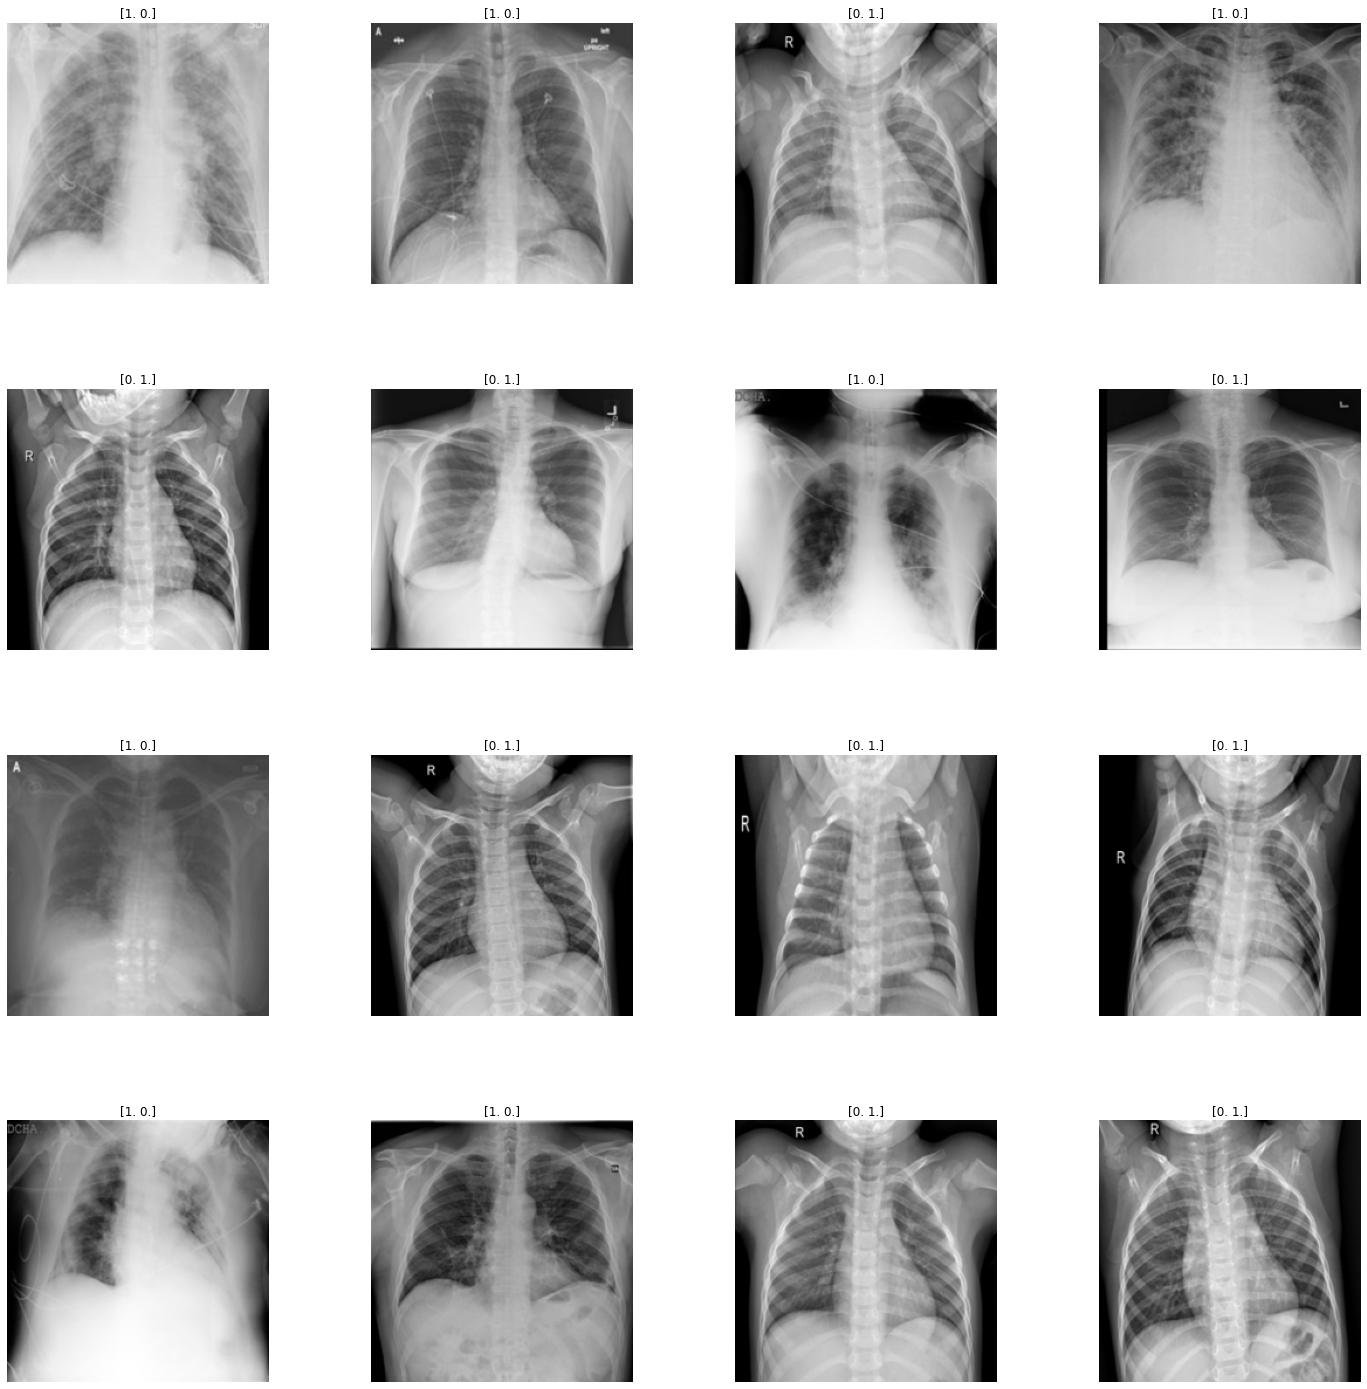

In [ ]:
Wid = 4 #width
Len = 4 #lenth
fig, axis = plt.subplots(Len, Wid, figsize = (25, 25))   #subplots
axis = axis.ravel()
num_training = len(X_train)
for i in np.arange(0, Len * Wid):
    index = np.random.randint(0, num_training)           # pick a random number
    axis[i].imshow(X_train[index])
    axis[i].set_title(Y_train[index])
    axis[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [ ]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])     # model training
print("Compiling Starts")
R = model.fit_generator(
    trainAug.flow(X_train, Y_train, batch_size=BS),
    steps_per_epoch=len(X_train) // BS,
    validation_data=(X_test, Y_test),
    validation_steps=len(X_test) // BS,
    epochs=EPOCHS)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Compiling Starts


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
50/50 [==============================] - 225s 5s/step - loss: 0.2652 - accuracy: 0.8975 - val_loss: 0.2246 - val_accuracy: 0.9000
Epoch 2/10
50/50 [==============================] - 225s 5s/step - loss: 0.2815 - accuracy: 0.8925 - val_loss: 0.2310 - val_accuracy: 0.8800
Epoch 3/10
50/50 [==============================] - 225s 5s/step - loss: 0.2872 - accuracy: 0.9025 - val_loss: 0.2190 - val_accuracy: 0.9000
Epoch 4/10
50/50 [==============================] - 225s 5s/step - loss: 0.2864 - accuracy: 0.8875 - val_loss: 0.2150 - val_accuracy: 0.9100
Epoch 5/10
50/50 [==============================] - 225s 5s/step - loss: 0.2452 - accuracy: 0.9175 - val_loss: 0.2150 - val_accuracy: 0.9100
Epoch 6/10
50/50 [==============================] - 225s 5s/step - loss: 0.2528 - accuracy: 0.9075 - val_loss: 0.2079 - val_accuracy: 0.9100
Epoch 7/10
50/50 [==============================] - 225s 5s/step - loss: 0.2598 - accuracy: 0.8875 - val_loss: 0.2208 - val_accuracy: 0.9000
Epoch 8/10
50

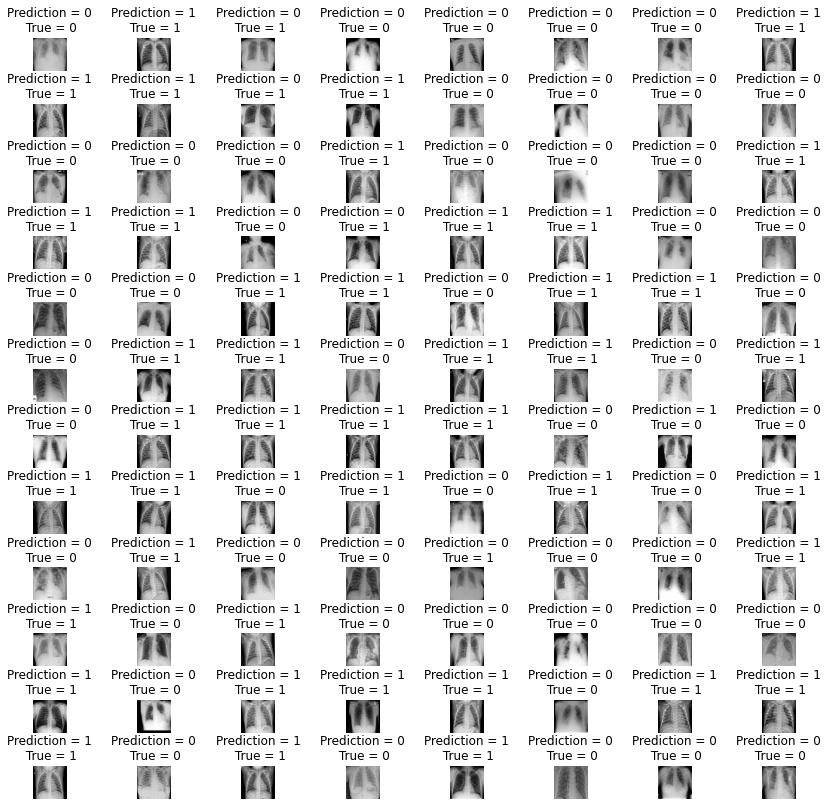

In [ ]:
L = 12
W = 8
fig, axis = plt.subplots(L, W, figsize = (14, 14))
axis = axis.ravel()
y_pred = model.predict(X_test, batch_size=BS)
for i in np.arange(0,L*W):
    axis[i].imshow(X_test[i])
    axis[i].set_title('Prediction = {}\n True = {}'.format(y_pred.argmax(axis=1)[i], Y_test.argmax(axis=1)[i]))
    axis[i].axis('off')

plt.subplots_adjust(wspace = 1, hspace=1)    # plot predicted result

In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = model.predict(X_test, batch_size=BS)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(Y_test.argmax(axis=1), y_pred,target_names=LB.classes_)) 

              precision    recall  f1-score   support

       Covid       0.91      0.96      0.93        50
      Normal       0.96      0.90      0.93        50

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [ ]:
# accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(Y_test.argmax(axis=1),y_pred)

0.93

[[48  2]
 [ 5 45]]
acc: 0.9300
sensitivity: 0.9600
specificity: 0.9000


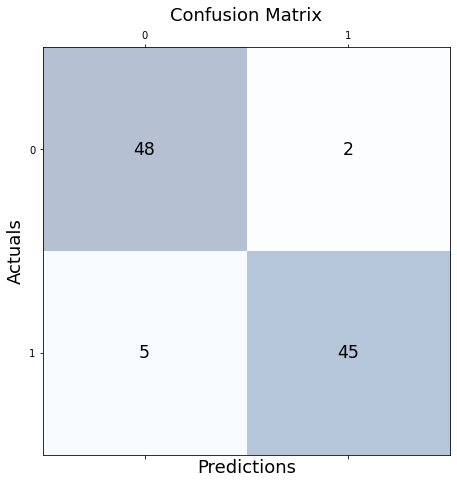

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.argmax(axis=1), y_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

# plot confusion matrix
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

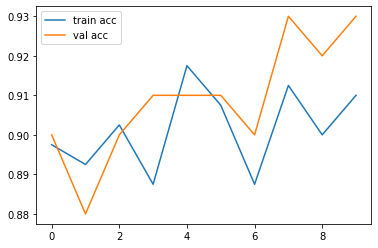

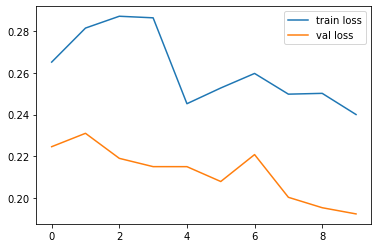

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot training and validation accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# plot validation and training loss
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [ ]:
model.save('Covid_model.h5')   # save trained model for further use

Prediction: Corona


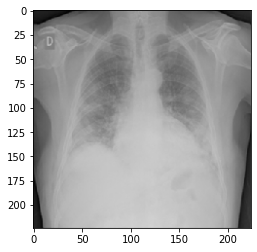

In [ ]:
import tensorflow as tf 
from keras.preprocessing import image
model = tf.keras.models.load_model('Covid_model.h5')
from keras.applications.vgg16 import preprocess_input
img = image.load_img('Data/Covid/COVID-6.png', target_size=(224, 224)) #insert a random covid-19 x-ray image for prediction
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred==[1]:
  print('Prediction: Corona')
else:
  print('Prediction: Normal')

Prediction: Normal


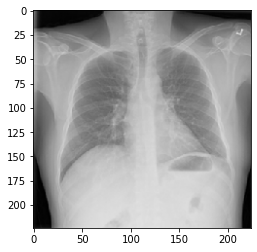

In [ ]:
img = image.load_img('Data/Normal/Normal-3.png', target_size=(224, 224)) #insert a random normal x-ray image for prediction
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred==[1]:
  print('Prediction: Normal')
else:
  print('Prediction: Corona')